# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [200]:
df=pd.read_csv('data/grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [201]:
type(df)

pandas.core.frame.DataFrame

In [202]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [203]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [204]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

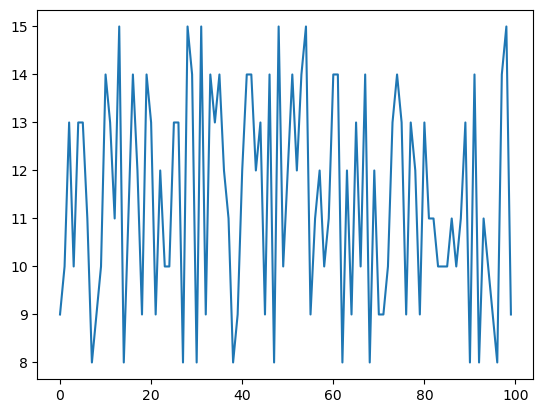

In [205]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

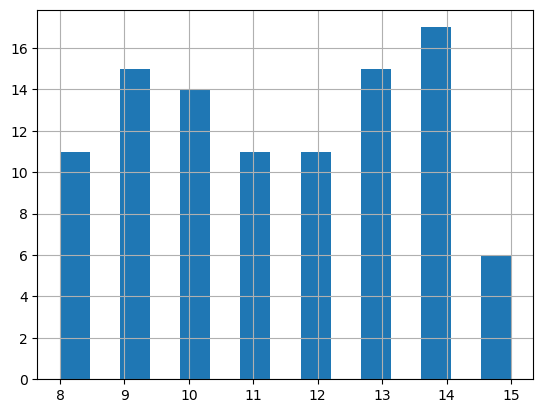

In [206]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [207]:
df.國文.mean()

11.39

算標準差。

In [208]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [209]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [210]:
df1=df.iloc[:,1:]
df1.head()
df1.corr()

#df無法做corr會有int和str共同存在的問題，故重做一個array，移除姓名只留分數

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [211]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [212]:
#df['總級分']=10
#a=df.sum(axis=1)
#df.head()
df1['總級分']=df1.sum(axis = 1)
#df1.head()

df['總級分']=df1.iloc[:,5]

#df1.iloc[:,5]
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [213]:
df['加權']=df.英文+df.國文+df.數學 
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,34
1,胡玉華,10,10,10,8,9,47,30
2,黃淑婷,13,15,8,11,14,61,36
3,陳上紫,10,10,8,9,14,51,28
4,崔靜成,13,12,14,12,13,64,39


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [214]:
df.sort_values(by="總級分",ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,40
12,李正偉,11,15,11,14,15,66,37
54,陳怡潔,15,15,9,15,11,65,39
25,蔡亦瑄,13,13,14,13,12,65,40
57,胡淳茜,12,15,14,13,11,65,41
37,曾怡君,11,12,15,13,14,65,38
48,陳怡婷,15,14,12,9,15,65,41
64,俞志峰,9,14,13,14,15,65,36
83,李士賢,10,14,15,13,13,65,39
87,趙偉希,10,13,14,13,15,65,37


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [215]:
df2=df.sort_values(by=["加權","總級分"],ascending=False)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,43
48,陳怡婷,15,14,12,9,15,65,41
57,胡淳茜,12,15,14,13,11,65,41
80,施雅鈴,13,15,12,13,13,66,40
25,蔡亦瑄,13,13,14,13,12,65,40


### 【重點】重設 index

In [216]:
df2.index=range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,43
2,陳怡婷,15,14,12,9,15,65,41
3,胡淳茜,12,15,14,13,11,65,41
4,施雅鈴,13,15,12,13,13,66,40
5,蔡亦瑄,13,13,14,13,12,65,40


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [217]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,43
6,詹威德,12,13,15,10,14,64,40
10,李士賢,10,14,15,13,13,65,39
12,曾怡君,11,12,15,13,14,65,38
13,林哲法,14,9,15,10,14,62,38
22,陳竹伯,10,12,15,10,14,61,37
24,葉儀依,9,13,15,8,14,59,37
32,周育霖,9,12,15,13,12,61,36
42,張雅彬,10,11,15,12,8,56,36
44,芮秋辛,11,10,15,10,8,54,36


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [218]:
df2[(df2.數學==15) & (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,43


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [219]:
df2=df2.drop("總級分",axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,43
2,陳怡婷,15,14,12,9,15,41
3,胡淳茜,12,15,14,13,11,41
4,施雅鈴,13,15,12,13,13,40
5,蔡亦瑄,13,13,14,13,12,40
...,...,...,...,...,...,...,...
96,林建亨,9,11,8,8,11,28
97,胡凱琳,10,8,9,9,15,27
98,林金鳳,8,9,10,10,8,27
99,梁慧君,9,8,8,8,12,25


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [225]:
df.drop("總級分",axis=1,inplace=True)
df

KeyError: "['總級分'] not found in axis"

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [228]:
df2.head(20)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,43
2,陳怡婷,15,14,12,9,15,41
3,胡淳茜,12,15,14,13,11,41
4,施雅鈴,13,15,12,13,13,40
5,蔡亦瑄,13,13,14,13,12,40
6,詹威德,12,13,15,10,14,40
7,童心怡,13,13,14,8,13,40
8,謝雅琳,13,14,13,12,9,40
9,陳怡潔,15,15,9,15,11,39
10,李士賢,10,14,15,13,13,39


In [230]:
df3=df2.drop(df2[df2.姓名=="李士賢"].index)
df3.head(20)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,43
2,陳怡婷,15,14,12,9,15,41
3,胡淳茜,12,15,14,13,11,41
4,施雅鈴,13,15,12,13,13,40
5,蔡亦瑄,13,13,14,13,12,40
6,詹威德,12,13,15,10,14,40
7,童心怡,13,13,14,8,13,40
8,謝雅琳,13,14,13,12,9,40
9,陳怡潔,15,15,9,15,11,39
11,崔靜成,13,12,14,12,13,39


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [257]:
from pandas_datareader import data as pdr
#import fix_yahoo_finance
import pandas_datareader as pdr
#import fix_yahoo_finance
df = pdr.get_data_stooq('AAPL')

In [258]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [259]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-22,192.265,192.8231,190.2700,190.90,34648547.0
2024-05-21,191.090,192.7300,190.9201,192.35,42309401.0
2024-05-20,189.325,191.9199,189.0100,191.04,44361275.0
2024-05-17,189.510,190.8100,189.1800,189.87,41282925.0
2024-05-16,190.470,191.0950,189.6601,189.84,52845230.0


#### 只要最後 300 個交易日!

In [264]:
df=df[-300:]
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-03,106.5250,109.9250,106.2260,107.2630,3.129518e+08
2020-07-31,101.3110,104.7900,99.2672,104.6400,3.801263e+08
2020-07-30,92.7422,94.8218,92.3293,94.7161,1.605934e+08
2020-07-29,92.3135,93.7670,92.2775,93.5846,9.173642e+07
2020-07-28,92.9216,93.0991,91.8169,91.8219,1.052398e+08
...,...,...,...,...,...
2019-06-03,42.7197,43.2800,41.4197,42.1544,1.660599e+08
2019-05-31,42.8703,43.2970,42.5712,42.5891,1.111706e+08
2019-05-30,43.2870,43.6000,42.9769,43.3737,8.722453e+07


#### 20 日的移動平均

<Axes: xlabel='Date'>

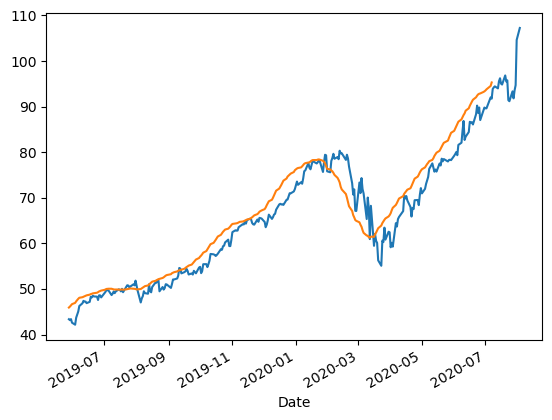

In [265]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

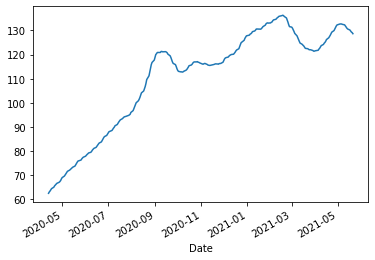

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

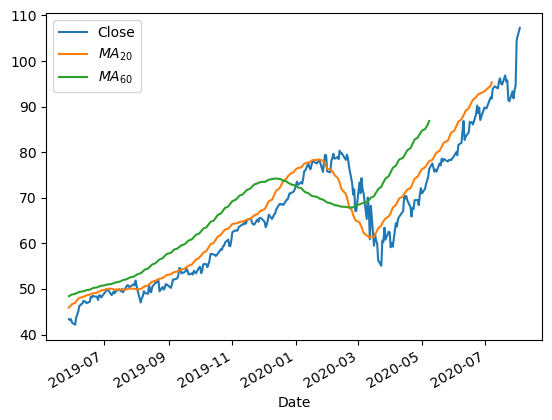

In [266]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [267]:
close=df.Close.values

len(close)

300

In [272]:
x=close[:-1]
len(x)
y=close[1:]
len(y)

299

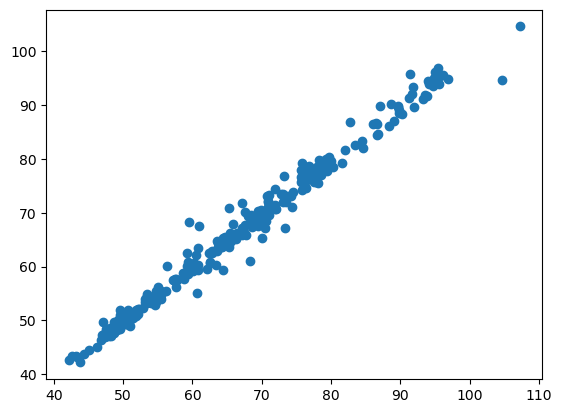

In [273]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [275]:
mydata = np.random.randn(4,3)

In [276]:
mydata

array([[-0.59253773,  0.13506808,  0.62973025],
       [ 1.2452503 , -1.28588392,  0.32506558],
       [-0.34038773, -0.41703557, -1.02135554],
       [ 0.49584494,  0.17211364,  0.9471623 ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [277]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [278]:
df2

,A,B,C
0,-0.592538,0.135068,0.629730
1,1.245250,-1.285884,0.325066
2,-0.340388,-0.417036,-1.021356
3,0.495845,0.172114,0.947162


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [280]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [281]:
df3

,A,B,C
0,-1.388511,0.684716,0.578636
1,1.898429,0.808210,1.534894
2,0.686685,1.138152,1.048107


In [286]:
df4=pd.concat([df2,df3],axis=0)
df4

,A,B,C
0,-0.592538,0.135068,0.629730
1,1.245250,-1.285884,0.325066
2,-0.340388,-0.417036,-1.021356
3,0.495845,0.172114,0.947162
0,-1.388511,0.684716,0.578636
1,1.898429,0.808210,1.534894
2,0.686685,1.138152,1.048107


前面我們弄得亂七八糟的 index 重設一下。

In [287]:
df4.index=range(7)

In [288]:
df4

,A,B,C
0,-0.592538,0.135068,0.629730
1,1.245250,-1.285884,0.325066
2,-0.340388,-0.417036,-1.021356
3,0.495845,0.172114,0.947162
4,-1.388511,0.684716,0.578636
5,1.898429,0.808210,1.534894
6,0.686685,1.138152,1.048107


#### 横向的貼

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [290]:
df5=pd.concat([df2,df3],axis=1)
df5

,A,B,C,A,B,C
0,-0.592538,0.135068,0.629730,-1.388511,0.684716,0.578636
1,1.245250,-1.285884,0.325066,1.898429,0.808210,1.534894
2,-0.340388,-0.417036,-1.021356,0.686685,1.138152,1.048107
3,0.495845,0.172114,0.947162,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [314]:
df_names = pd.read_csv('data/names.csv',names=['姓名'])

In [315]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [316]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [317]:
df_grades

,國文,英文,數學,社會,自然
0,6,9,9,10,12
1,12,12,6,9,11
2,8,8,13,11,8
3,10,10,12,7,13
4,13,8,8,8,10
...,...,...,...,...,...
95,8,15,6,14,6
96,15,10,6,15,9
97,7,14,11,15,7
98,14,9,9,9,11


In [318]:
df_grades.to_csv('data/grades3.csv')

In [319]:
df_x=pd.concat([df_names,df_grades],axis=1)

In [320]:
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,6,9,9,10,12
1,王紹尹,12,12,6,9,11
2,黃季坤,8,8,13,11,8
3,許正書,10,10,12,7,13
4,張鈞蓮,13,8,8,8,10
...,...,...,...,...,...,...
95,陳君生,8,15,6,14,6
96,曾桂甫,15,10,6,15,9
97,林欣怡,7,14,11,15,7
98,林佳霖,14,9,9,9,11
